# CSV to SQL

I often get requests like this:

> Eitan: I have some data I would like to put into a database  
DBA: Can you send me an insert script?  
Eitan: Sure ... \<spends way too much time converting a dataframe into an SQL insert script\>

I wrote a Python script, others use Excel but something feels off ...


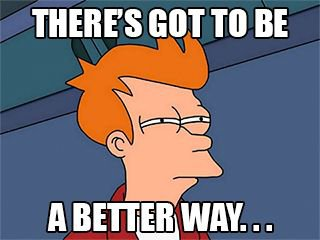

## Problem Statement

Given a csv can I produce the corresponding SQL bulk insert statement?

How can I turn this:

In [1]:
import pandas as pd

df = pd.read_csv('data.csv')
df.head()

,Date,Name,Value
0,2022-11-24 22:34:55,WZMHH,NaN
1,2022-05-30 14:44:47,DIXFU,NaN
2,2022-10-22 08:38:49,OHCUI,0.637045
3,2022-12-12 17:40:29,GEVAZ,0.529207
4,2022-06-13 08:00:40,GBRDD,0.376432


into this:

```sql
INSERT INTO SAMPLE_TABLE (Date, Name, Value)
VALUES
 ('2022-11-24 22:34:55', 'WZMHH', NULL),
 ('2022-05-30 14:44:47', 'DIXFU', NULL),
 ('2022-10-22 08:38:49', 'OHCUI', 0.6370445113549524),
 ('2022-12-12 17:40:29', 'GEVAZ', 0.5292072971005523),
 ('2022-06-13 08:00:40', 'GBRDD', 0.376431751315491),
```

I don't want to execute the transaction. 

I want to write the insert statement to a file `insert_data.sql`